# Task 5

**The purpose of the work:** to learn how to build a one-factor regression model, evaluate its
quality and the quality of its work

### Variant 2
Because my student ID number is 8ПМ32422


## Task 2

1. Display the data and plot a scatterplot. Define the dependent and independent variables.
2. Check for "normality" variables. Draw your own conclusions.
3. Find the correlation between the dependent and independent variables. Draw your own
conclusions.
4. Find the parameters of paired linear regression and build a calculation table.
5. Evaluate the quality of the parameters of the constructed model: mixed correlation
coefficient (R2-statistic), residual standard deviation (RSD), F-statistic, etc. Draw your
own conclusions.
6. Check the significance of the parameters of the regression equation and the regression
equation itself at a significance level of 0.05).
7. Plot the regression line on the scatterplot.

| Capita income, Y ($) | Human development index, X1 | Human poverty index, X2 |
|----------------------|-----------------------------|-------------------------|
| 1600                 | 0,866                       | 14,9                    |
| 7100                 | 0,833                       | 11,7                    |
| 6750                 | 0,883                       | 11,7                    |
| 6130                 | 0,801                       | 18,8                    |
| 6110                 | 0,848                       | 10,7                    |
| 4190                 | 0,730                       | 10,9                    |
| 3850                 | 0,514                       | 34,8                    |
| 3680                 | 0,566                       | 41,7                    |
| 3650                 | 0,717                       | 22,8                    |
| 3280                 | 0,711                       | 20,7                    |
| 2680                 | 0,672                       | 17,7                    |
| 2600                 | 0,589                       | 22,5                    |
| 2600                 | 0,625                       | 17,5                    |
| 2200                 | 0,513                       | 17,3                    |
| 2150                 | 0,445                       | 46,8                    |
| 1370                 | 0,328                       | 41,3                    |
| 1350                 | 0,393                       | 41,6                    |
| 1350                 | 0,446                       | 36,7                    |


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

In [6]:
import pandas as pd

Y = np.array([1600, 7100, 6750, 6130, 6110, 4190, 3850, 3680, 3650, 3280, 2680, 2600, 2600, 2200, 2150, 1370, 1350, 1350])
X1 = np.array([0.866, 0.833, 0.883, 0.801, 0.848, 0.730, 0.514, 0.566, 0.717, 0.711, 0.672, 0.589, 0.625, 0.513, 0.445, 0.328, 0.393, 0.446])
X2 = np.array([14.9, 11.7, 11.7, 18.8, 10.7, 10.9, 34.8, 41.7, 22.8, 20.7, 17.7, 22.5, 17.5, 17.3, 46.8, 41.3, 41.6, 36.7])

df = pd.DataFrame.from_dict({'Y': Y, 'X1': X1, 'X2': X2})
df

,Y,X1,X2
0,1600,0.866,14.9
1,7100,0.833,11.7
2,6750,0.883,11.7
3,6130,0.801,18.8
4,6110,0.848,10.7
5,4190,0.730,10.9
6,3850,0.514,34.8
7,3680,0.566,41.7
8,3650,0.717,22.8
9,3280,0.711,20.7


In [7]:
df.describe()

,Y,X1,X2
count,18.000000,18.000000,18.000000
mean,3480.000000,0.637778,24.450000
std,1896.482813,0.173355,12.411581
min,1350.000000,0.328000,10.700000
25%,2162.500000,0.513250,15.500000
50%,2980.000000,0.648500,19.750000
75%,4105.000000,0.783250,36.225000
max,7100.000000,0.883000,46.800000


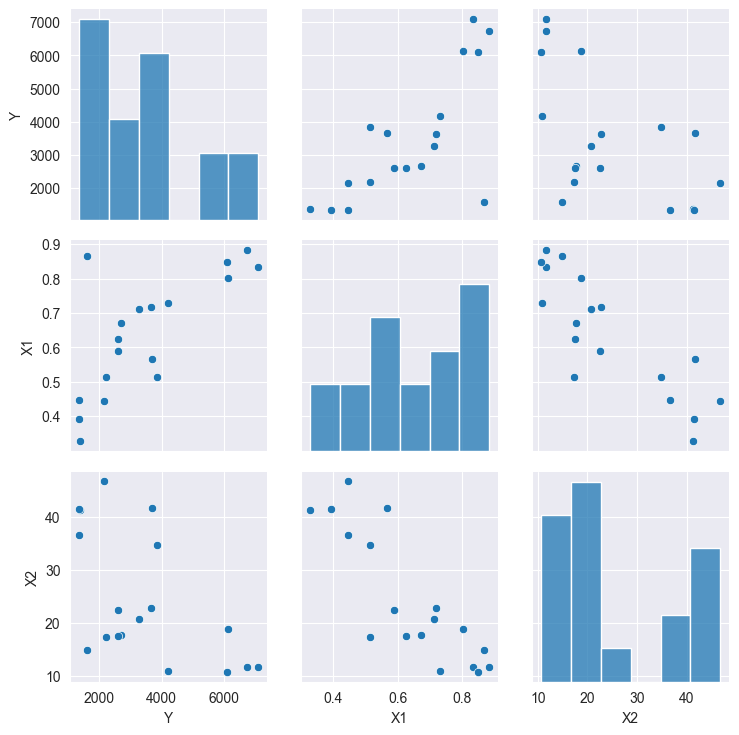

In [9]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

It is not possible to tell from the graphs whether the Y and X2 columns are normal, statistical test required

But it is possible to notice that **per capita income (Y)** is probably linearly dependent on **human poverty index (X2)** and **human development index (X1)**

### Test for normality with Shapiro-Wilk test.

p-value = 0.05

In [10]:
from scipy.stats import shapiro

shapiro(df['Y'])

ShapiroResult(statistic=0.8878657028862468, pvalue=0.035480990317192526)

In [11]:
shapiro(df['X2'])

ShapiroResult(statistic=0.8634385882091558, pvalue=0.013896661125399107)

Both p-values are less than 0.05. Therefor, Y X2 is not normally distributed accordingly Shapiro-Wilk test.
Maybe it's because it's small sample.

### Correlations

<Axes: >

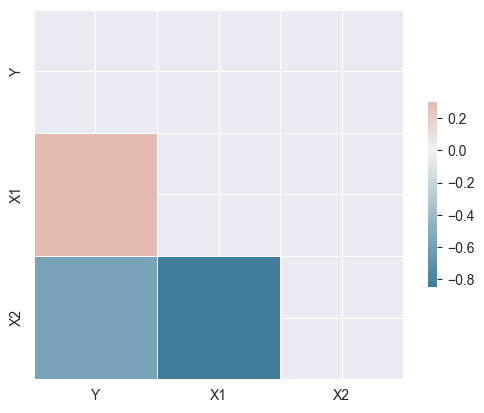

In [12]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
from scipy.stats import linregress

reg_line = linregress(df['X2'], df['Y'])
reg_line

LinregressResult(slope=-87.22184355077984, intercept=5612.574074816567, rvalue=-0.57082563794939, pvalue=0.013357572197898977, stderr=31.36481103675318, intercept_stderr=855.110634018864)

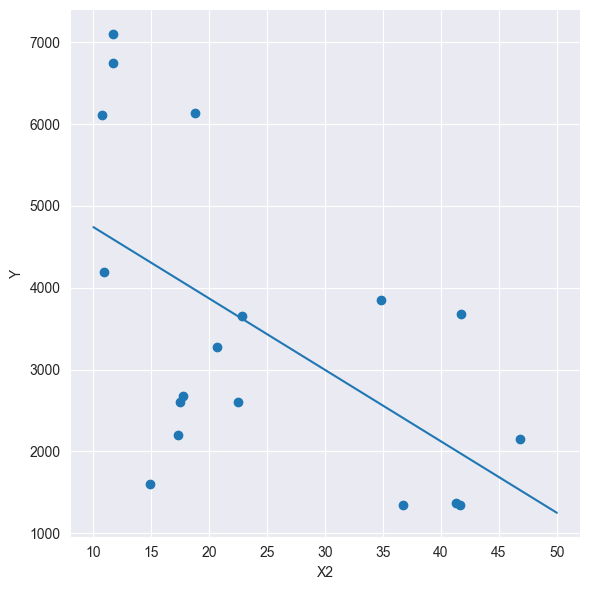

In [29]:
line_X = np.linspace(10, 50, 18)
line_Y = reg_line.slope * line_X + reg_line.intercept

g = sns.FacetGrid(df, height=6)
g = g.map(plt.scatter, 'X2', 'Y')
plt.plot(line_X, line_Y)

**Y** and **X2** have a negative, weak correlation.

But plot shows expected linear dependence.

In [54]:
y_pred = df['X2'] * reg_line.slope + reg_line.intercept
y = df.sort_values(by='X2', ascending=True)['Y']

### R2 score

In [55]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.13002036096422886

### RSD

In [67]:
def residual_standard_deviation(y_true, y_p):
    residuals = y_true - y_p
    squared_residuals = residuals ** 2
    mean_squared_residuals = np.mean(squared_residuals)
    return np.sqrt(mean_squared_residuals)

In [68]:
residual_standard_deviation(y, y_pred)

1513.2754791008351

Predicted values a

In [66]:
import statsmodels.api as sm

X = sm.add_constant(df['X2'])

model = sm.OLS(y.to_numpy(), X).fit()

model.summary()

C:\Users\hjklv\AppData\Local\pypoetry\Cache\virtualenvs\data-analysis-methods-99e_IxHd-py3.12\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.035
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.101
Time:                        02:04:09   Log-Likelihood:                -159.32
No. Observations:                  18   AIC:                             322.6
Df Residuals:                      16   BIC:                             324.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4971.7665    954.829      5.207      0.000    2947.620    6995.913
X2           -61.0129     35.022     -1.742      0.101    -135.257      13.231
==============================================================================
Omnibus:                        0.701   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.717
Skew:                           0.283   Prob(JB):                        0.699
Kurtosis:                       2.202   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model is not statistically significant**

## Task 2

1. Use the data from lab #3 (the dataset you chose).
2. Select dependent and independent variables, build a linear regression.
3. Plot a scatterplot, determine if there are outliers, check the distribution of your variables
for "normality".
4. Find the correlation coefficient between the variables, draw a conclusion.
5. Find the paired linear regression coefficients, determine the quality of the found
parameters, as well as their confidence intervals. Draw your own conclusions.
6. Evaluate the performance of the model (prediction): Divide the data set into a sample of
80:20 (training: test). Draw conclusions about the accuracy of the constructed model.
7. Using k-Fold cross-validation, evaluate the accuracy of your model



In [74]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [75]:
df = pd.DataFrame(data=np.c_[diabetes.data, diabetes.target], columns=diabetes.feature_names + ['target'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


**s1** - dependent

**s2** - const

In [78]:
df = df[['s1', 's2']]

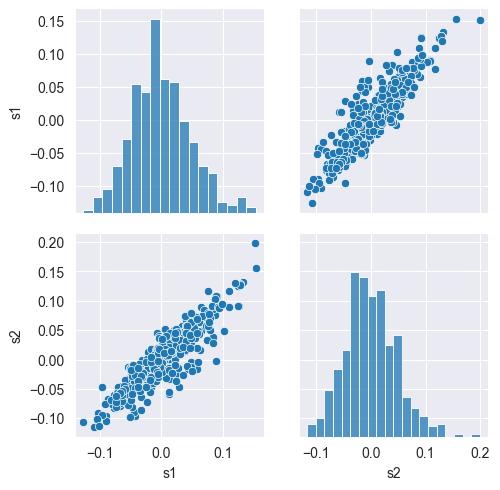

In [79]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Histograms shows that s1 and s2 are normally distributed. 

In [132]:
import statsmodels.api as sm

s2 = sm.add_constant(df['s2'].to_numpy())

model = sm.OLS(df['s1'].to_numpy(), s2).fit(cov_type="fixed scale")

predictions = model.predict(s2)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                    0.8040
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.370
Time:                        03:16:56   Log-Likelihood:                 1079.2
No. Observations:                 442   AIC:                            -2154.
Df Residuals:                     440   BIC:                            -2146.
Df Model:                           1                                         
Covariance Type:          fixed scale                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.369e-17      0.048  -2.88e-16      1.000      -0.093       0.093
x1             0.8967      1.000      0.897      0.370      -1.063       2.857
==============================================================================
Omnibus:                       76.759   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.153
Skew:                           1.025   Prob(JB):                     3.32e-29
Kurtosis:                       4.709   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors are based on fixed scale
"""

In [133]:
model.params

array([-1.36880524e-17,  8.96662958e-01])

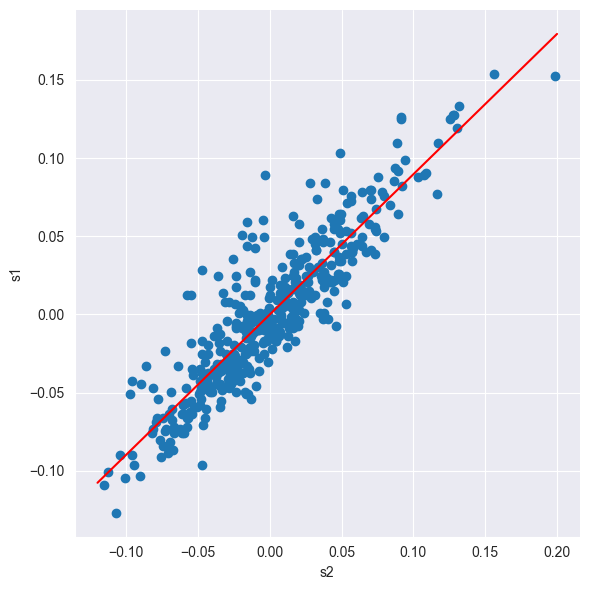

In [135]:
line_X = np.linspace(-0.12, 0.20, 442)
line_Y = model.params[0] + model.params[1] * line_X

g = sns.FacetGrid(df, height=6)
g = g.map(plt.scatter, 's2', 's1')
plt.plot(line_X, line_Y, color='red')

Number of outliers at s1: 8
Number of outliers at s2: 7


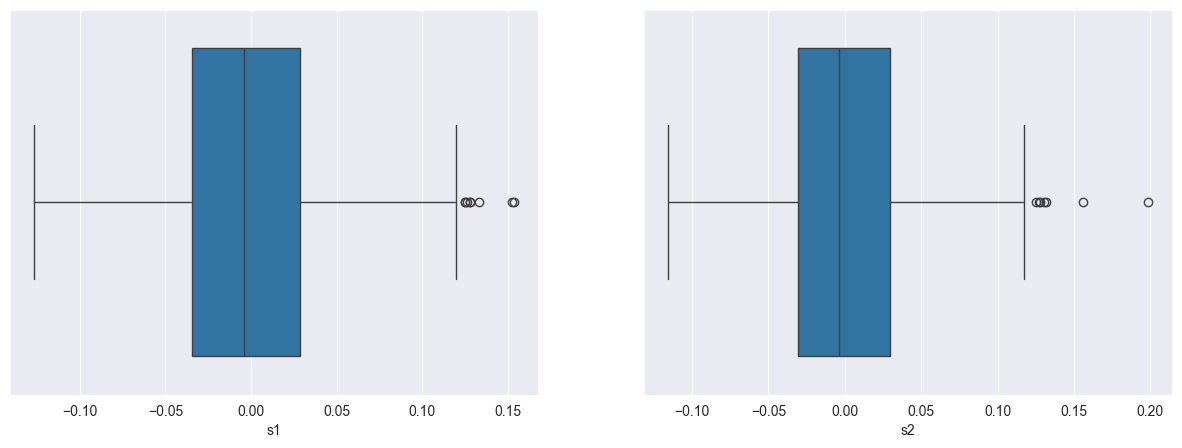

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.boxplot(data=df, x='s1', ax=axes[0])
sns.boxplot(data=df, x='s2', ax=axes[1])


def count_outliers(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return np.sum((series < lower_bound) | (series > upper_bound))


print("Number of outliers at s1:", count_outliers(df['s1']))
print("Number of outliers at s2:", count_outliers(df['s2']))

In [137]:
df.corr()

,s1,s2
s1,1.000000,0.896663
s2,0.896663,1.000000


Correlation coefficient is pretty much

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['s2'], df['s1'], test_size=0.2, random_state=42)


s2 = sm.add_constant(X_train.to_numpy())
model = sm.OLS(y_train, s2).fit(cov_type="fixed scale", cov_kwds={'scale': 1})
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     s1   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                    0.6382
Date:                Thu, 19 Sep 2024   Prob (F-statistic):              0.425
Time:                        03:29:59   Log-Likelihood:                 851.94
No. Observations:                 353   AIC:                            -1700.
Df Residuals:                     351   BIC:                            -1692.
Df Model:                           1                                         
Covariance Type:          fixed scale                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.053      0.003      0.998      -0.104       0.104
x1             0.8940      1.119      0.799      0.424      -1.299       3.087
==============================================================================
Omnibus:                       64.734   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.327
Skew:                           1.069   Prob(JB):                     4.95e-24
Kurtosis:                       4.650   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors are based on fixed scale
"""

In [152]:
model.params

const    0.000165
x1       0.893956
dtype: float64

In [155]:
from sklearn.metrics import r2_score

r2_score(y_train, model.params.const + model.params.x1 * X_train)

0.7939937125088611

In [ ]:
residual_standard_deviation(y_train, model.params.const + model.params.x1 * X_train)

In [157]:
r2_score(y_test, model.params.const + model.params.x1 * X_test)

0.8444858239039836

In [158]:
residual_standard_deviation(y_test, model.params.const + model.params.x1 * X_test)

0.018490778872382544

In [160]:
from sklearn.base import BaseEstimator, RegressorMixin
class SmOLS(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None

    # Fit method (required by sklearn)
    def fit(self, X, y):
        X_with_const = sm.add_constant(X)  # Add intercept
        self.model = sm.OLS(y, X_with_const).fit()  # Fit the OLS model
        return self

    # Predict method (required by sklearn)
    def predict(self, X):
        X_with_const = sm.add_constant(X)  # Add intercept
        return self.model.predict(X_with_const)

In [165]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SmOLS(), X_test, y_test, cv=5, scoring='neg_mean_squared_error')
average_mse = -scores.mean()
average_mse

0.0003800943448964966

Scores are small

Model is statistically significant